# Laboratorium 4


In [517]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import time
from typing import List, Tuple

In [2]:
INCH_TO_PIXEL = 96

In [58]:
def showImg(n):

    fig, ax = plt.subplots(figsize = (n/INCH_TO_PIXEL + 5, n/INCH_TO_PIXEL + 5))
    matrix = np.random.choice((0, 1), (n, n))
    plt.imshow(matrix, interpolation="nearest")
    plt.xticks([])
    plt.yticks([])
    plt.gray()
    plt.show()

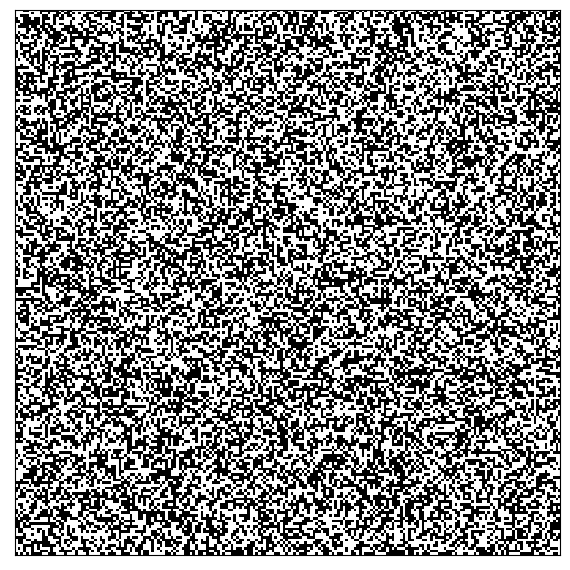

In [59]:
showImg(200)

### Zadanie 1 - problem komiwojażera 

Losowanie n punktów na płaszczyźnie

In [422]:
def random_points(a, b, n, switch):
    """Generate random 2D points from uniform distrubution
    :param float a: low boundary of randomness
    :param float b: high boundary of randomness
    :param int n: number of points to generate
    :return np.array: array that contains number points
    """

    cut_num = (a - b + 1) / 5
    cut_n = n // 9
    last_batch = n - n // 9 * 9
    next_num = [1, 3, 5]
    to_return = []
    match (switch):
        case 1:
            return np.random.uniform(a, b, (n, 2))
        case 3:
            for j in range(3):
                for k in range(3):
                    for l in range(cut_n):
                        to_return.append(
                            [np.random.uniform(
                                cut_num * (next_num[j] - 1), cut_num * next_num[j]
                            ),
                            np.random.uniform(
                                cut_num * (next_num[k] - 1), cut_num * next_num[k]
                            )]
                        )
            return np.array(to_return)


In [259]:
def show_points(points):
    fig, ax = plt.subplots()
    ax.scatter(*zip(*points), s=[1])
    x = []
    y = []
    for i in range(len(points)):
        if i%2==0:
            x.append(points[i][0])
            y.append(points[i][1])
        else: 
            x.append(points[i][0])
            y.append(points[i][1])
    x.append(points[0][0])
    y.append(points[0][1])
    plt.plot(x, y)
    plt.show()

In [503]:
def show_energy(energy, temp):
    n = np.linspace(0, 50, 20)
    new_energy = [energy[i] for i in range(min(10000, len(energy)))]
    fig, ax = plt.subplots()
    ax.plot(new_energy, linewidth=1.0)
   #  ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
   #     ylim=(0, 8), yticks=np.arange(1, 8))
    plt.show()

In [54]:
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

In [394]:
def exp_temp(arg, temp):
    return np.e ** (arg / temp)

In [395]:
def line_temp(arg, temp):
    return np.abs(arg * temp)

In [403]:
def acceptance_probability(diff_cost, temp, func):
    p = np.random.rand()
    
    p_accept = func(diff_cost, temp)
    
    if p_accept >= p:
        return True
    return False



In [362]:
def swap_consecutive(tab):
    node1 = np.random.choice(len(tab))
    node2 = (node1 + 1) % len(tab)
    tab[[node1, node2]] = tab[[node2, node1]]

def swap_arbitrary(tab):
    node1 = np.random.choice(len(tab))
    node2 = np.random.choice(len(tab))
    tab[[node1, node2]] = tab[[node2, node1]]

In [350]:
def get_new_composition(tab: np.array, swap):
    arr = np.copy(tab)
    swap(arr)
    return arr
    

In [88]:
def get_weight(tab, node1, node2):
    return euclidean_distance(tab[node1], tab[node2])

In [89]:
def get_energy(tab):
    distance = 0
    
    for i in range(len(tab)):
        city_start = i
        city_end = None
        if i+1 < len(tab):
            city_end = i+1
        else:
            city_end = 0
        distance += get_weight(tab, city_start, city_end)
    # energy = 1/float(distance)
    return distance

In [511]:
def annealing(arr, swap_func, temp_func, temp, alpha):
    simulated = get_energy(arr)
    curr_temp = temp
    ALPHA = alpha
    ERA = len(arr)
    energy = []
    begin_distance = get_energy(arr)

    max_iteration = 10000
    max_same_solution = 1000

    iteration_counter = 0
    solution_counter = 0

    while iteration_counter < max_iteration and solution_counter < max_same_solution:
        test_solution = get_new_composition(arr, swap_func)
        diff_cost = get_energy(arr) - get_energy(test_solution)
        energy.append(get_energy(arr))

        if diff_cost > 0:
            arr = test_solution
            iteration_counter = 0
            solution_counter = 0

        elif np.isclose(diff_cost, 0):
            arr = test_solution
            iteration_counter += 1
            solution_counter = 0
        
        else:
            if acceptance_probability(diff_cost, curr_temp, temp_func):
                # print(arr)
                arr = test_solution
                solution_counter = 0
                iteration_counter = 0
                # time.sleep(0.5)
            else:
                solution_counter += 1
                iteration_counter += 1
        curr_temp = curr_temp * ALPHA
        print ("{:.16f}".format(curr_temp), end="\r")
    end_distance = get_energy(arr)
    print()
    print("Start distance: {}   Final distance: {}".format(begin_distance, end_distance))
    return arr, energy


In [482]:
a = random_points(0, 2, 50, 1)

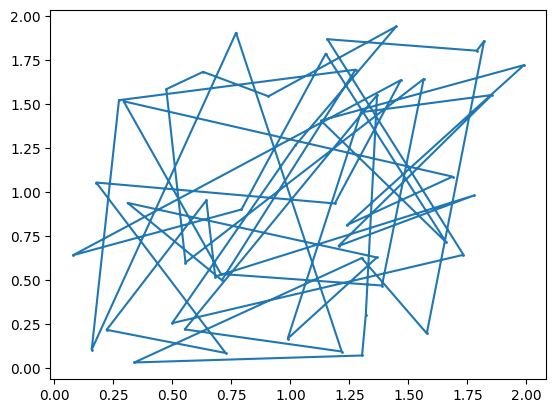

In [483]:
show_points(a)

In [515]:
tab1 = annealing(a, swap_arbitrary, exp_temp, 20, 0.999)

0.00000000003375733
Start distance: 48.70320154572158   Final distance: 14.069579265839645


In [498]:
tab2 = annealing(a, swap_consecutive, exp_temp, 1000, 0.999)


Start distance: 48.70320154572158   Final distance: 35.739913555303055


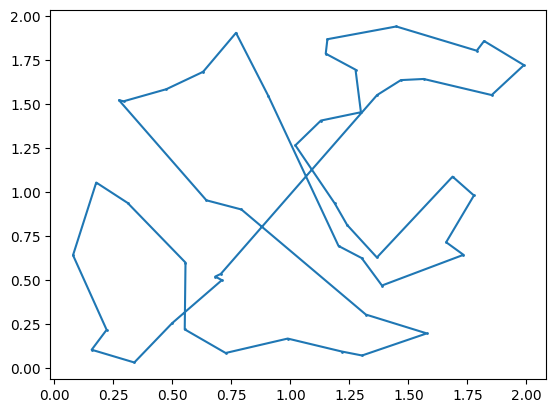

In [516]:
show_points(tab1[0])

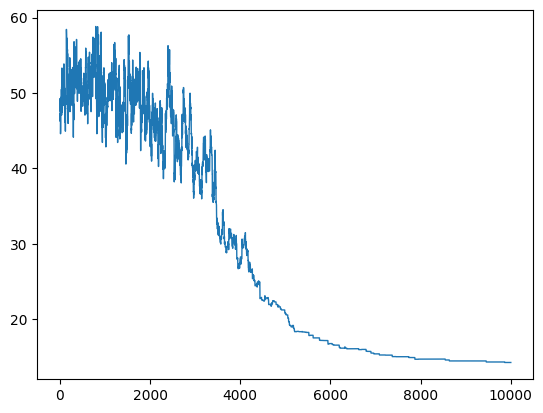

In [510]:
show_energy(tab1[1], 20)

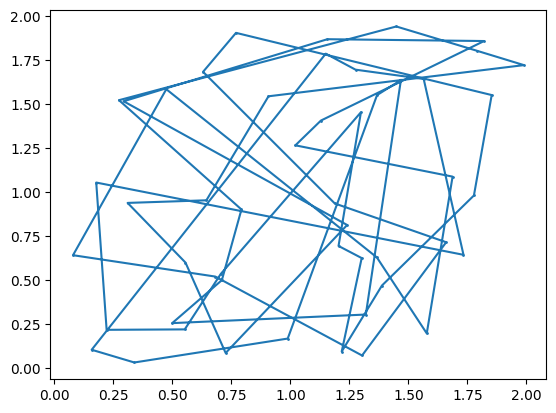

In [505]:
show_points(tab2[0])

### Zadanie 2

In [ ]:
# maksymalizujemy energię
def two_right_two_left(matrix, coord):
    row, col = coord
    n = len(matrix)
    return (matrix[(row + 1) % n][col], matrix[(row + 2) % n][col],
            matrix[(row - 1)][col], matrix[(row - 2)][col])

class Energy:
    # everything if its going on an energy and the neighbourhood
    def __init__(self, func = lambda x: x**2, field_getter = None) -> None:
        self.func = func
        self.field_getter = field_getter
        ...
    
    def compute_energy(self, matrix, x):
        return self.func(self.sum_active_neighbours(matrix, x))
    
    def get_neighbours(self, matrix,  x):
        return self.field_getter(matrix, x)

    def sum_active_neighbours(self, matrix, x):
        return sum(self.get_neighbours(matrix, x))

    def set_energy_func(self, func):
        self.func = func
    
    def set_field_getter(self, field_getter):
        self.field_getter = field_getter

class BinaryImage:
    def __init__(self, image: np.array, energy_elem: Energy):
        self.image = np.copy(image)
        self.energy = energy_elem
        self.neighbour_matrix = None

    # zwraca obliczoną energię dla zmienionych czarnych pól
    def compute_neighbour_matrix(self, ): 
        ...
        

    def solve_image(self, ): 
        ...
    
    def get_neighbours(self, ): ... # return positions (position in matrix) of given coordinate element

    def calculate_diff(self, x: Tuple[int, int], y: Tuple[int, int]):
        # x - current position
        # y - future position
        if self.image[x] == self.image[y]:
            return 0
        
        current_energy = self.energy

        fields1 = self.energy.get_neighbours(self.image, x)
        fields2 = self.energy.get_neighbours(self.image, y)

        fields = set(fields1 + fields2)
        fields1 = list(fields.difference(fields2))
        fields2 = list(fields.difference(fields1))


        result = 0
        for field in (fields1 + fields2):
            result += self.energy.compute_energy(self.neighbour_matrix, field)

        change_val = 1 if self.image[x] == 0 else -1

        # TODO -> see what is going on after change (for sum)


    def swap(self,): ...


    def draw(self): ...
